In [2]:
from pylab import *
%matplotlib inline

In [107]:
def rk4(ec,p_ini,x,args=0,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [108]:
def e_mov(r_v,t,fric=0,k=1):
    dx = r_v[2]
    dy = r_v[3]
    if fric == 0:
        dvx,dvy = -k*r_v[0],-k*r_v[1]
        #print "No use un modelo de friccion"
    else:    
        dvx = -k*r_v[0] - fric([dx,dy])[0]
        dvy = -k*r_v[1] - fric([dx,dy])[1]
    return array([dx,dy,dvx,dvy])

In [109]:
def e_mov_pol(r_v,t,fric=0,k=1):
    dx = r_v[2]
    dy = r_v[3]
    dxp =  r_v[2]*cos(r_v[1])-r_v[0]*r_v[3]*sin(r_v[1])
    dyp =  r_v[2]*sin(r_v[1])+r_v[0]*r_v[3]*cos(r_v[1])
    if fric == 0:
        dvy,dvx = -2*r_v[2]*r_v[3],-k*r_v[0] + r_v[0]*(r_v[3]**2)
    else:
        dvy = (-2*r_v[2]*r_v[3] + (fric([dxp,dyp])[0])*sin(r_v[1]) - (fric([dxp,dyp])[1])*cos(r_v[1]))/(r_v[0])
        dvx = -k*r_v[0] - (fric([dxp,dyp])[0])*cos(r_v[1]) -(fric([dxp,dyp])[1])*sin(r_v[1]) + r_v[0]*(r_v[3]**2)
    return array([dx,dy,dvx,dvy])

In [110]:
def fric_v(v,gamma=0.1,mu=0.2):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    if norm_v < 1:
        f_x = gamma*v[0]
        f_y = gamma*v[1]
    else:    
        f_x = mu*(norm_v**(1.5))*v[0]
        f_y = mu*(norm_v**(1.5))*v[1]
    return array([f_x,f_y]) 

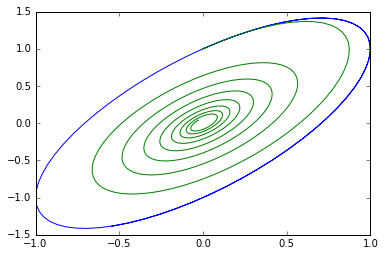

In [111]:
p = [0,1,1,1]
t,sol_id=rk4(e_mov,p,[0,10])
t,sol_fv=rk4(e_mov,p,[0,50],fric_v)
plot(sol_id[:,0],sol_id[:,1])
plot(sol_fv[:,0],sol_fv[:,1])
show()

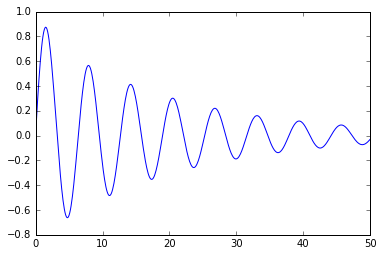

In [112]:
plot(t,sol_fv[:,0])

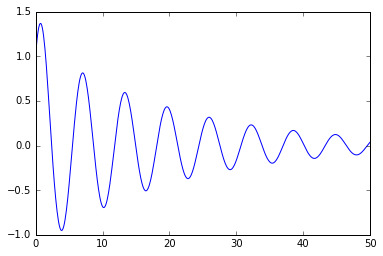

In [113]:
plot(t,sol_fv[:,1])

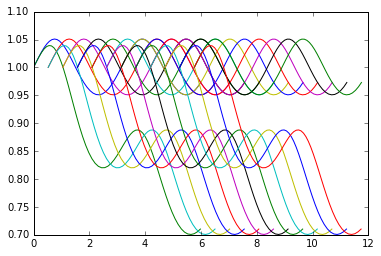

In [114]:
for j in range(12):
    p = [1,(j*pi)/6,.1,1]
    t,sol_idp=rk4(e_mov_pol,p,[0,6])
    t,sol_fvp=rk4(e_mov_pol,p,[0,6],fric_v)
    plot(sol_idp[:,1],sol_idp[:,0])
    plot(sol_fvp[:,1],sol_fvp[:,0])
show()

426 0.014954783788


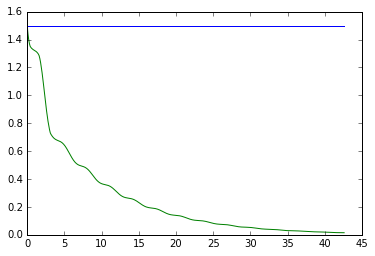

In [126]:
p = [0,1,1,1]
norm_v_i = (p[2]**2 + p[3]**2)
norm_r_i = (p[0]**2 + p[1]**2)
E_in = .5*(norm_v_i + norm_r_i) 
E_fin = .01*E_in 
E_fv[-1] = E_in 

i = 0
while (E_fv[-1]) >= E_fin:
    i += 1
    
    t,sol_id=rk4(e_mov,p,[0,i*.1])
    t,sol_fv=rk4(e_mov,p,[0,i*.1],fric_v)
    norm_v_id = (sol_id[:,2]**2 + sol_id[:,3]**2)
    norm_r_id = (sol_id[:,0]**2 + sol_id[:,1]**2)
    norm_v_fv = (sol_fv[:,2]**2 + sol_fv[:,3]**2)
    norm_r_fv = (sol_fv[:,0]**2 + sol_fv[:,1]**2)
    E_id = .5*(norm_v_id + norm_r_id)
    E_fv = .5*(norm_v_fv + norm_r_fv)
print i, E_fv[-1]   
plot(t,E_id,t,E_fv)
show()

0.014954783788


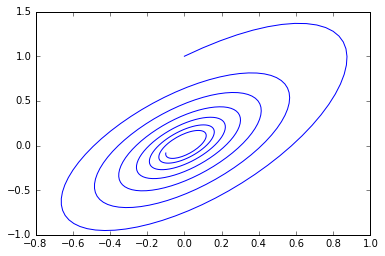

In [127]:
plot(sol_fv[:,0],sol_fv[:,1])
print E_fv[-1]